In [49]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [50]:
print('insightface', insightface.__version__)
print('numpy', np.__version__)

insightface 0.7.3
numpy 2.0.2


# 1. Detectando as faces

In [51]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640,640))

y:\Github2\face-change\face_venv\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\wilso/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\wilso/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\wilso/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\wilso/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\wilso/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

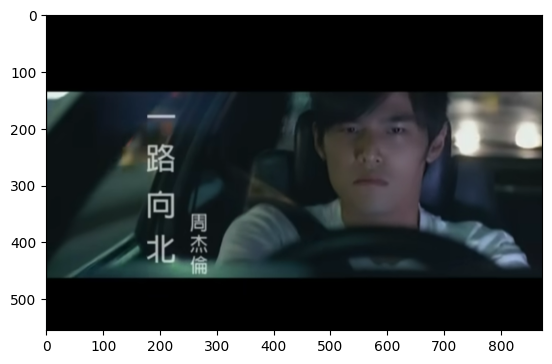

In [52]:
img = cv2.imread('takumi2.png')
plt.imshow(img[:,:,::-1])
plt.show()

In [53]:
faces = app.get(img)

In [54]:
len(faces)

1

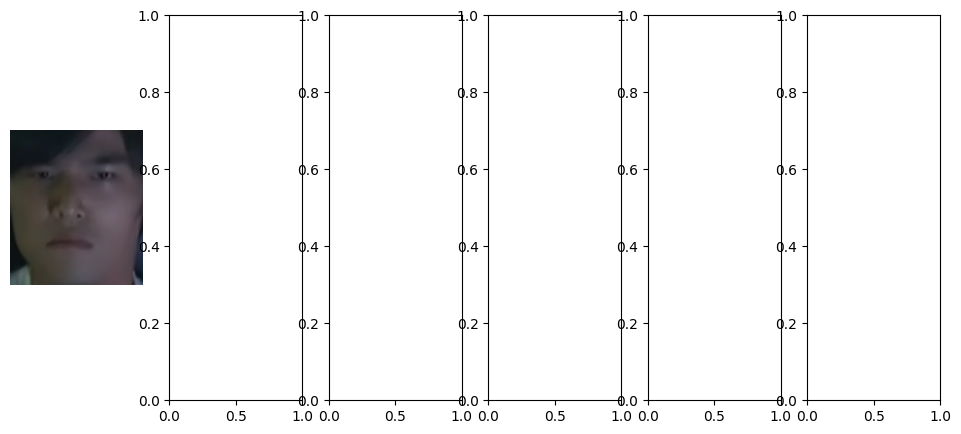

In [55]:
fig, axs = plt.subplots(1, 6, figsize=(12, 5))
for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis('off')

# 2. Face Swapping

In [56]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx',
                                          download=False,
                                          download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


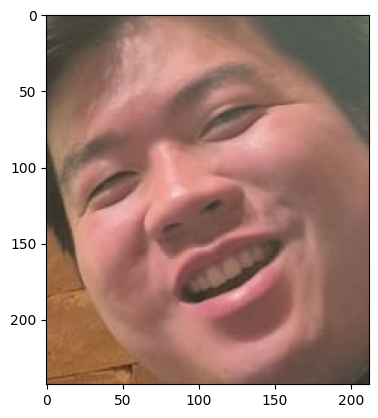

In [57]:
img_swap = cv2.imread('daigo.jpeg')
source_faces = app.get(img_swap)
source_face = source_faces[0]
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img_swap[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [58]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)

# Plot the Swapped Faces

In [65]:
plt.figure(frameon=False)
plt.imshow(res[:, :, ::-1])
plt.axis('off')

plt.savefig('result.png',
            bbox_inches='tight',
            pad_inches=0)

plt.close()

In [60]:
plt.savefig('result.png')

<Figure size 640x480 with 0 Axes>